# Minimalistic plotting example

In [1]:
import discretisedfield as df
import matplotlib.pyplot as plt
%matplotlib inline

/Users/fangohr/anaconda3/envs/discretisedfield/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


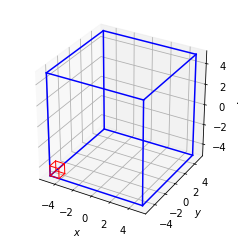

In [2]:
# NBVAL_IGNORE_OUTPUT
mesh = df.Mesh(p1=(-5, -5, -5), p2=(5, 5, 5), cell=(1, 1, 1))
mesh

In [3]:
# NBVAL_IGNORE_OUTPUT
def val(pos):
    x, y, z = pos
    return y, x, x*y

def norm_fun(pos):
    x, y, z = pos
    if x**2 + y**2 + z**2 < 5**2:
        return 1
    else:
        return 0

field = df.Field(mesh, value=val, norm=norm_fun)

## Plotting scalar component (x, y, z)

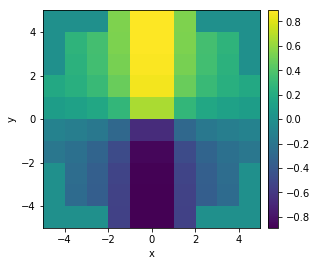

In [4]:
# NBVAL_IGNORE_OUTPUT
field.x.plot_plane("z")

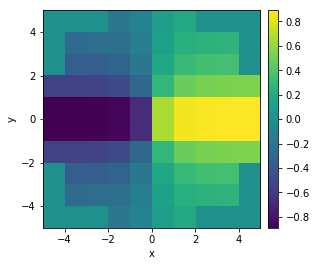

In [5]:
# NBVAL_IGNORE_OUTPUT
field.y.plot_plane("z")

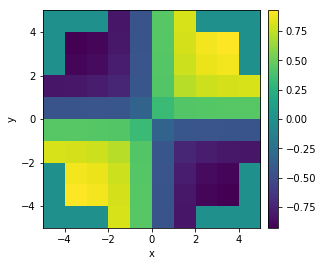

In [6]:
# NBVAL_IGNORE_OUTPUT
field.z.plot_plane("z")

## Plotting vector

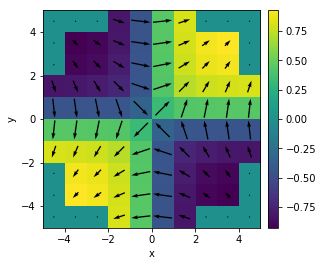

In [7]:
# NBVAL_IGNORE_OUTPUT
field.plot_plane("z")

## Divided plotting

Text(0,0.5,'y label')

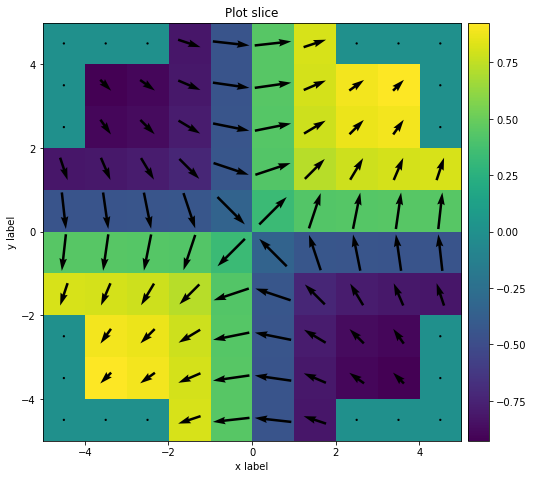

In [8]:
# NBVAL_IGNORE_OUTPUT
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

imax = field.z.imshow("z", ax=ax, interpolation="nearest", cmap="viridis")
qvax = field.quiver("z", ax=ax, n=(10, 10))
field.colorbar(ax, imax)

ax.set_title("Plot slice")
ax.set_xlabel("x label")

ax.set_ylabel("y label")

## Wishlist

- plot a scalar field
- plot a vector field
  - colour the vectors depending on the magnitude/component
- slices
- cones instead of arrows
- zero vectors
- time-dependent data

In [9]:
import ipyvolume

In [10]:
import numpy as np
import ipyvolume as iv

def quiver(field, **kwargs):
    x, y, z = np.array(list(field.mesh.coordinates)).T
    u, v, w = field.array.T
    u = u.flatten()
    v = v.flatten()
    w = w.flatten()
    iv.figure()
    return iv.quiver(x, y, z, u, v, w, **kwargs)

fig = quiver(field, size=10)
iv.gcc()

In [11]:
from ipywidgets import FloatSlider, ColorPicker, VBox, jslink
size = FloatSlider(min=0, max=30, step=0.1)
color = ColorPicker()
jslink((fig, 'size'), (size, 'value'))
jslink((fig, 'color'), (color, 'value'))
VBox([iv.gcc(), size, color])

In [14]:
def quiver(field, **kwargs):
    x, y, z = np.array(list(field.mesh.coordinates)).T
    u, v, w = field.array.T
    u = u.flatten()
    v = v.flatten()
    w = w.flatten()
    colors = np.array((u*0.5+0.5, np.ones(shape=u.shape), np.ones(shape=u.shape))).T
    iv.figure()
    return iv.quiver(x, y, z, u, v, w, color=colors, **kwargs)

fig = quiver(field, size=10)
iv.gcc()

In [15]:
iv.quickvolshow(field.array[:,:,:,0])

/Users/fangohr/anaconda3/envs/discretisedfield/lib/python3.6/site-packages/ipyvolume/serialize.py:66: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


In [16]:
iv.pylab.volshow(field.array[:,:,:,0])

/Users/fangohr/anaconda3/envs/discretisedfield/lib/python3.6/site-packages/ipyvolume/serialize.py:66: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


Figure(anglex=0.017124176732556444, angley=-0.01199281380526776, anglez=1.2206432175569537, camera_center=[0.0…

In [17]:
iv.figure()
iv.pylab.plot_isosurface(field.array[:,:,:,0])
iv.gcc()

In [41]:
iv.pylab.volshow(field.array[:,:,:,0)

SyntaxError: invalid syntax (<ipython-input-41-dfd763ed1f0e>, line 1)

In [42]:
x, y, z = np.array(list(field.mesh.coordinates)).T
u = field.x.array.flatten()
v = field.y.array.flatten()
w = field.z.array.flatten()


In [53]:
np.array((x,y,z)).T.shape

(1000, 3)

In [58]:
np.array((u, np.ones(shape=u.shape), np.ones(shape=u.shape))).T.shape

(1000, 3)